In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-exam-performance-prediction/student_exam_data_new.csv
/kaggle/input/student-exam-performance-prediction/student_exam_data.csv


In [40]:
data = pd.read_csv('/kaggle/input/student-exam-performance-prediction/student_exam_data.csv')
data.head()


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0
Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

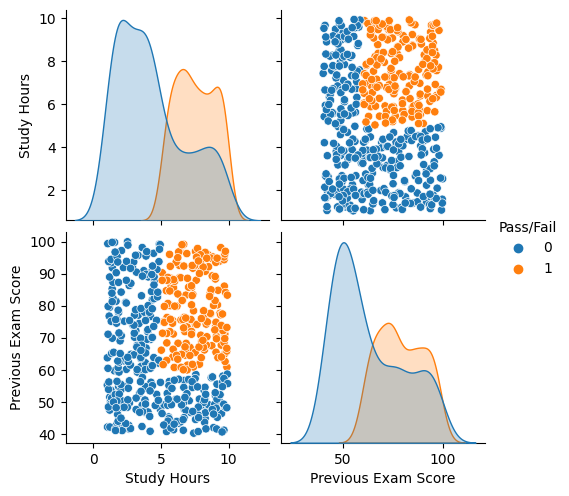


Logistic Regression:
[[58  6]
 [ 8 28]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100


K-Nearest Neighbors:
[[63  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.97      0.92      0.94        36

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100


Naive Bayes:
[[64  0]
 [ 7 29]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        64
           1       1.00      0.81      0.89        36

    accuracy                           0.93       100
   macro avg 

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming `data` is your dataframe

# Display the first few rows of the data
print(data.head())

# Step 2: Preprocess the data (check for missing values)
print(data.isnull().sum())

# If there are missing values, you can handle them by dropping or filling. For example:
# data = data.dropna()  # This drops rows with any missing values

# Step 3: Explore the data (optional)
sns.pairplot(data, hue='Pass/Fail')
plt.show()

# Step 4: Feature Engineering
# Split the data into features (X) and target (y)
X = data[['Study Hours', 'Previous Exam Score']]
y = data['Pass/Fail']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Train and evaluate Logistic Regression
print("\nLogistic Regression:")
lr_model = LogisticRegression(random_state=42)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)

# Train and evaluate K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

# Train and evaluate Naive Bayes
print("\nNaive Bayes:")
nb_model = GaussianNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test)
